In [11]:
#import hypernetx as hnx
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
#from PyComplexHeatmap import *

import sys
sys.path.append('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/')
from incidenceToProjection import makeHiC_fromInc
from chains import IncDFCreator, increaseIncDF_binSize
from chains import RealHiC
from utils import flatten

## Set up. 
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_hypergraphSimulations/getMultiwayInteractions_fromBPChains/'


In [35]:
## Read in example file
exMat1 = np.loadtxt(f'{dataDir}chains_500_10000_1500_1681171613/chain_dist_5292.txt')
## Read in example file
exMat2 = np.loadtxt(f'{dataDir}chains_500_10000_1500_1681171613/chain_dist_113.txt')

nrow = exMat1.shape[0]
cutoff = 500

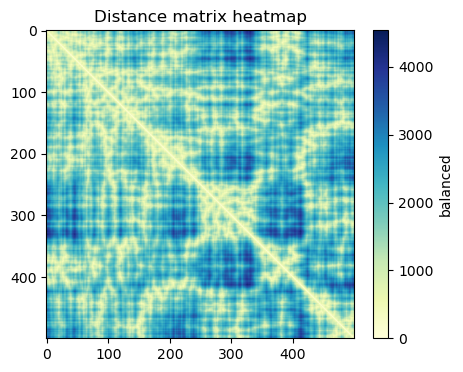

In [36]:
chainDir = f'{dataDir}chains_500_10000_1500_1696950861/'
# num_files = 300
# binaryInit = RealHiC(chainDir,num_files)
# binMat = binaryInit.distMatToBinary(281)

plt.figure(figsize=(6, 4))
im = plt.imshow(exMat1, cmap="YlGnBu")
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Distance matrix heatmap")
plt.show()

In [ ]:
def averageNChains(seed,sampleSize,matching_files):
    random.seed(seed)
    mat = None
    for f in random.sample(matching_files,sampleSize):
        oneChain = np.loadtxt(f)
        chainDFs.append(oneChain)
        if mat is None:
            mat = (oneChain / sampleSize)
        else:
            mat += (oneChain / sampleSize)
    return(mat)

In [ ]:
distPattern = "chain_dist_*.txt"
matching_files = glob.glob(f'{dataDir}chains_500_10000_1500_1681171613/{distPattern}')
random.seed(10)
sampleSize = 4

avgMat = None
dfs = []
chainDFs = []

for f in random.sample(matching_files,sampleSize):
    oneChain = np.loadtxt(f)
    chainDFs.append(oneChain)
    if avgMat is None:
        avgMat = (oneChain / sampleSize)
    else:
        avgMat += (oneChain / sampleSize)
    chainDF = makeIncDF_fromChainDists(oneChain)
    print(chainDF.shape)
    dfs.append(chainDF)

combined_incDF = pd.concat(dfs,axis=1)
combined_incDF.shape

In [ ]:
plt.figure(figsize=(6, 4))
im = plt.imshow(avgMat, cmap="YlGnBu")
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Distance matrix heatmap")
plt.show()

In [ ]:

plt.figure(figsize=(8, 8))
 
for i, matrix in enumerate(chainDFs):
    plt.subplot(2, 2, i + 1)
    im = plt.imshow(matrix, cmap="YlGnBu")
    plt.colorbar(im, fraction=0.05, pad=0.04)
    plt.title(f"Chain {i+1}")

plt.tight_layout()
plt.show()

In [ ]:
print(chainDFs[0][0:4,0:4])
print(chainDFs[1][0:4,0:4])
print(chainDFs[2][0:4,0:4])
print(chainDFs[3][0:4,0:4])
print(avgMat[0:4,0:4])


In [37]:
creator = IncDFCreator(1, 500, 550, 3)
exChain = creator.makeIncDF_fromChainDists_mp(exMat1)

exChain.shape

(500, 7421)

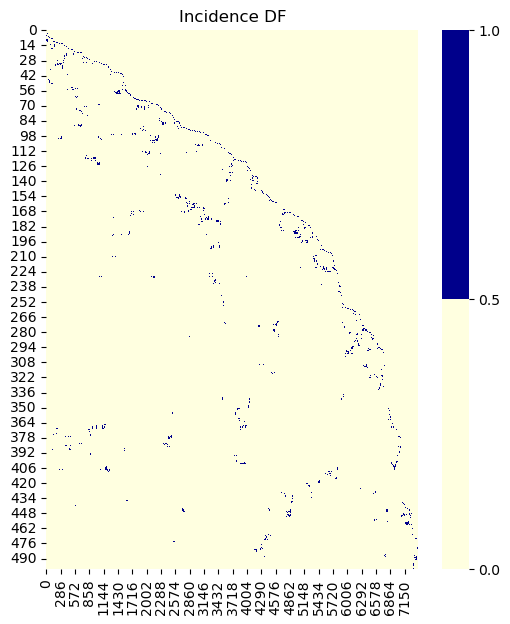

In [38]:
from matplotlib.colors import BoundaryNorm, ListedColormap

my_colors = ["lightyellow",'darkblue']
my_cmap = ListedColormap(my_colors)
bounds = [0, 0.5, 1]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

plt.figure(figsize=(6, 7))
im = sns.heatmap(exChain, cmap=my_cmap,norm = my_norm)
plt.title("Incidence DF")
plt.show()

In [39]:
exChain_by5 = increaseIncDF_binSize(exChain,5)
exChain_by5

,0,1,2,4,5,6,7,8,9,10,...,7403,7405,7406,7407,7410,7412,7413,7415,7416,7417
Bin0:4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin5:9,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin10:14,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin15:19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin20:24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bin475:479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin480:484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin485:489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bin490:494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
## Convert incidence matrix to 2d hiC matrix
def makeHiC_fromInc(incDF):
    nrow = incDF.shape[0]
    ncol = incDF.shape[1]
    binIDs = list(incDF.index)
    df = pd.DataFrame(np.zeros(shape = (nrow,nrow)), index=binIDs, columns=binIDs)
    for read in incDF.columns:
        arr = incDF[read][incDF[read] == 1].index
        for a in arr:
            df.loc[a][a] += 1
        combs = list(combinations(arr,2))
        for c in combs:
            df.loc[c[0]][c[1]] += 1
            df.loc[c[1]][c[0]] += 1
    return(df)

In [ ]:
hic_mat = makeHiC_fromInc(df)

In [ ]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(6, 4))
im = plt.imshow(hic_mat, cmap="YlOrRd",norm = LogNorm(vmax=100, vmin = 0.05))
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title(f"Projection matrix: threshold = {cutoff}")
plt.show()

In [ ]:
#chain_dir = f'{dataDir}chains_500_10000_1500_1681171613/'
chain_dir = f'{dataDir}chains_500_10000_1500_1696950861/'
num_files = 1000
hic_processor = RealHiC(chain_dir,num_files)
hic1k = hic_processor.distFilesToRealHiC()

In [ ]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(6, 4))
im = plt.imshow(hic1k, cmap="YlOrRd",norm = LogNorm())
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title(f"Real HiC matrix")
plt.show()

In [ ]:
np.where(exMat1 < 500, 1, 0)

In [ ]:
card = df.sum()

In [ ]:
# Generate a histogram
plt.figure(figsize=(6,4))
plt.hist(card, bins='auto')

# Add labels and title
plt.xlabel('Cardinality')
plt.ylabel('Frequency')
plt.title('Histogram of cardinality from chain')

# Display the histogram
plt.show()

In [ ]:
avgMat1 = averageNChains(seed=101,sampleSize=5,matching_files = matching_files)
chains1 = makeIncDF_fromChainDists(avgMat1)
print(chains1.shape)

avgMat2 = averageNChains(seed=102,sampleSize=5,matching_files = matching_files)
chains2 = makeIncDF_fromChainDists(avgMat2)
print(chains2.shape)

In [ ]:
plt.figure(figsize=(6, 4))
im = plt.imshow(avgMat1, cmap="YlGnBu")
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Avg Mat - 1")
plt.show()

plt.figure(figsize=(6, 4))
im = plt.imshow(avgMat2, cmap="YlGnBu")
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Avg Mat - 2")
plt.show()

In [ ]:
chains1_bin5 = increaseIncDF_binSize(chains1,5)
chains2_bin5 = increaseIncDF_binSize(chains2,5)

In [ ]:
H1 = hnx.Hypergraph.from_incidence_dataframe(chains1)
H2 = hnx.Hypergraph.from_incidence_dataframe(chains2)

In [ ]:
h1_nodes = []
for e in H1.edges:
    h1_nodes.append(tuple(H1.edges[e]))

h2_nodes = []
for e in H2.edges:
    h2_nodes.append(tuple(H2.edges[e]))

In [ ]:
common_elements = set(h1_nodes).intersection(set(h2_nodes))
print(len(common_elements),len(h1_nodes),len(h2_nodes))

In [ ]:
common_elements

## SCRATCHPAD 

In [ ]:
chains1 = makeIncDF_fromChainDists(exMat1,500)
chains2 = makeIncDF_fromChainDists(exMat2,500)

In [ ]:
chains1by5 = increaseIncDF_binSize(chains1,5)
chains1by5 = chains1by5.loc[:,chains1by5.sum() >= 2]

In [ ]:
chains2by5 = increaseIncDF_binSize(chains2,5)
chains2by5 = chains2by5.loc[:,chains2by5.sum() >= 2]

In [ ]:
def increaseIncDF_binSize(df,binSize):
    result = []
    names = []
    for i in range(0,len(df) - binSize,binSize):
        summed_value = df.loc[i:i+binSize-1,:].sum()
        summed_value[summed_value > 0] = 1
        names.append(f"Bin{i}:{i+binSize-1}")
        result.append(summed_value)
    result_df = pd.DataFrame(result,index = names)
    return(result_df)

In [ ]:
def dfToDict(df,result_dict):
    for col in df.columns:
        indices = df.index[df[col] == 1].tolist()
        key = '_'.join(indices)

        result_dict[key] = result_dict.get(key, 0) + 1
    return(result_dict)

In [ ]:
def dictToDF(hpDict):
    indices = list(set(flatten([key.split('_') for key in hpDict.keys()])))
    columns = []
    colnames = []
    counter = 0

    for key, value in hpDict.items():
        counter+=1
        col_ix = key.split('_')
        column = pd.Series([0] * len(indices),index = indices)  # Initialize row with zeros
        column[col_ix] = 1
        colName = f"Read{counter}:{value}"
        colnames.append(colName)
        columns.append(column)

    df = pd.concat(columns,axis=1)
    df.columns = colnames
    return(df)

In [ ]:
emptyDict = {}
chains1_dict = dfToDict(chains1by5,emptyDict)
emptyDict = {}
chains2_dict = dfToDict(chains2by5,emptyDict)


In [ ]:
chains1_new = dictToDF(chains1_dict)
chains1_new.shape

In [ ]:
def constructFullDict(listOfDFs):
    result_dict = {}
    for df in listOfDFs:
        result_dict = dfToDict(df,result_dict)
    return(result_dict)

In [ ]:
fullDF = dictToDF(result_dict)

In [ ]:
fullDF.shape

In [ ]:
fullDF

## Trying to make things more efficient

In [1]:
import numpy as np
import pandas as pd
import argparse

import sys
sys.path.append('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/')
from incidenceToProjection import makeHiC_fromInc
from chains import IncDFCreator, increaseIncDF_binSize

In [2]:
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_hypergraphSimulations/getMultiwayInteractions_fromBPChains/'
inputDir = 'chains_500_10000_1500_1681171613/'

prim_cutoff = 500
sec_cutoff = 550
numProcesses = 4
offDiagLim = 3

In [3]:
fileNum = 5
exMat = np.loadtxt(f'{dataDir}{inputDir}/chain_dist_{fileNum}.txt')

In [4]:
creator = IncDFCreator(numProcesses, prim_cutoff, sec_cutoff, offDiagLim)
exChain = creator.makeIncDF_fromChainDists_mp(exMat)

In [28]:
fileNum = 7
exMat = np.loadtxt(f'{dataDir}{inputDir}/chain_dist_{fileNum}.txt')
exChain = creator.makeIncDF_fromChainDists_mp(exMat)

In [7]:
exChain.to_parquet(f'{dataDir}/tmp0.pq',compression="gzip")

In [30]:
exChain.to_hdf(f'{dataDir}tmp.h5', key='df7', mode='a')

In [12]:
exChain.to_pickle(f'{dataDir}/tmp0.pkl')

In [11]:
a1 = pd.read_parquet(f'{dataDir}/tmp0.pq')

In [13]:
a2 = pd.read_pickle(f'{dataDir}/tmp0.pkl')

In [33]:
a3 = pd.read_hdf(f'{dataDir}tmp.h5',key='7')

In [35]:
def constructFullDict(numFiles):
    """Takes in a directory of DFs and outputs a dict"""
    result_dict = {}
    numEdges = []
    for ix in range(1,numFiles+1):
        filePath = f'{dataDir}/{inputDir}/binConcatInc_{offDiagDist}_600_750_{ix}.pkl'
        if os.path.isfile(filePath):
            bIncDF = pd.read_pickle(filePath)
            result_dict = dfToDict(bIncDF,result_dict)
            nE = len(result_dict)
            numEdges.append(nE)
    return(result_dict,numEdges)

In [2]:
import numpy as np
import pandas as pd
from itertools import combinations
import random
import os.path
import pickle

import sys
sys.path.append('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/')
from chains import dfToDict

inputDir = 'chains_10k_500_projectionMtxOutput/'
offDiagDist = 3

In [43]:
hpEdges, numEdges = constructFullDict(5)

In [44]:
def constructFullDict_h5(numFiles):
    """Takes in a directory of DFs and outputs a dict"""
    result_dict = {}
    numEdges = []
    for ix in range(1,numFiles+1):
        filePath = f'{dataDir}/{inputDir}/binConcatInc_3_500_550.h5'
        if os.path.isfile(filePath):
            bIncDF = pd.read_hdf(filePath,key = f'df{ix}')
            result_dict = dfToDict(bIncDF,result_dict)
            nE = len(result_dict)
            numEdges.append(nE)
    return(result_dict,numEdges)

In [25]:
outDir = "tmpDir/"
inputDir ="chains_10k_500_projectionMtxOutput/"
numFiles = 20
chunk_size = 5
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_hypergraphSimulations/getMultiwayInteractions_fromBPChains/'

In [26]:
def process_chunk(dataDir, inputDir, outDir, offDiagDist, chunk, chunk_size):
    """Process a chunk of files and write temporary output."""
    result_dict = {}
    numEdges = []

    start_file = (chunk - 1) * chunk_size + 1
    end_file = chunk * chunk_size

    print("Start file:",start_file, "End file =", end_file)
    
    for ix in range(start_file, end_file + 1):
        filePath = f'{dataDir}/{inputDir}/binConcatInc_3_600_750.h5'
        try:
            bIncDF = pd.read_hdf(filePath, key=f'df{ix}')
            print("bInc exists for ",ix)
    #        if bincDF is not None:
            #result_dict = dfToDict(bIncDF, result_dict)
            #nE = len(result_dict)
            #numEdges.append(nE)
        except KeyError:
            print("Does not exist")
            bincDF = None

    # # Write temporary output for the current chunk
    # temp_output_file = f'{dataDir}/{outDir}hyperEdges_{offDiagDist}_600_750_{chunk}_chains.pkl'
    # with open(temp_output_file, 'wb') as f:
    #     pickle.dump(result_dict, f)

    # temp_num_edges_file = f'{dataDir}{outDir}numEdges_{offDiagDist}_600_750_{chunk}_chains.txt'
    # np.savetxt(temp_num_edges_file, numEdges, delimiter='\t', fmt='%d')

In [27]:
for i in range(1,20):
    print("Chunk",i)
    process_chunk(dataDir, inputDir, outDir, offDiagDist, i, chunk_size)

Chunk 1
Start file: 1 End file = 5
bInc exists for  1
bInc exists for  2
bInc exists for  3
Does not exist
Does not exist
Chunk 2
Start file: 6 End file = 10
bInc exists for  6
bInc exists for  7
bInc exists for  8
bInc exists for  9
bInc exists for  10
Chunk 3
Start file: 11 End file = 15
bInc exists for  11
bInc exists for  12
bInc exists for  13
bInc exists for  14
bInc exists for  15
Chunk 4
Start file: 16 End file = 20
bInc exists for  16
bInc exists for  17
bInc exists for  18
bInc exists for  19
bInc exists for  20
Chunk 5
Start file: 21 End file = 25
bInc exists for  21
bInc exists for  22
bInc exists for  23
bInc exists for  24
Does not exist
Chunk 6
Start file: 26 End file = 30
bInc exists for  26
bInc exists for  27
bInc exists for  28
bInc exists for  29
bInc exists for  30
Chunk 7
Start file: 31 End file = 35
bInc exists for  31
bInc exists for  32
bInc exists for  33
bInc exists for  34
bInc exists for  35
Chunk 8
Start file: 36 End file = 40
bInc exists for  36
Does not 

In [33]:
ix = 38
filePath = f'{dataDir}/{inputDir}/binConcatInc_3_600_750.h5'
bIncDF = pd.read_hdf(filePath, key=f'df{ix}')

KeyError: 'No object named df38 in the file'

In [31]:
bIncDF

,1,2,3,4,5,6,7,8,9,10,...,136209,136210,136211,136214,136215,136216,136217,136218,136220,136221
Bin0:4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin5:9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin10:14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin15:19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin20:24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bin475:479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin480:484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin485:489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bin490:494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## SCRATCHPAD #2

In [189]:
iDF = pd.read_pickle(f'{dataDir}chains_10k_500_projectionMtxOutput/incDF_3_600_750_9414.pkl')
bDF = pd.read_pickle(f'{dataDir}chains_10k_500_projectionMtxOutput/binConcatInc_3_600_750_9414.pkl')

In [190]:
incDF_rownames = ['Bin'+str(i) for i in range(500)]
iDF.index = incDF_rownames

In [191]:
from chains import dfToDict
bDict = {}
bDict = dfToDict(bDF,bDict)

In [192]:
#roi = 'Bin35:39_Bin95:99_Bin170:174_Bin185:189_Bin190:194_Bin200:204_Bin220:224'
roi = 'Bin5:9_Bin120:124_Bin160:164_Bin355:359_Bin485:489'
bDict[roi]

75

In [193]:
ids = roi.split("_")

In [194]:
### this is convoluted but it works
sevenWay1 = np.where(bDF.sum() == 5)[0].tolist()
print(len(sevenWay1))
actualColname = [bDF.columns[s] for s in sevenWay1]
subset_binnedDF = bDF[actualColname]
print(subset_binnedDF.shape)
subset_binnedDF2 = subset_binnedDF.loc[ids]
print(subset_binnedDF2.shape)
sevenWay2 = np.where(subset_binnedDF2.sum() == 5)[0].tolist()
print(len(sevenWay2))
actualColname2 = [subset_binnedDF2.columns[s] for s in sevenWay2]
subset_binnedDF2[actualColname2]

11283
(100, 11283)
(5, 11283)
75


,5294,5295,5339,5340,5358,5359,5365,5394,5395,5410,...,7048,7244,7245,7247,7248,7249,7250,7252,7254,7296
Bin5:9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bin120:124,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bin160:164,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bin355:359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bin485:489,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [195]:
roi_iDF = iDF[actualColname2]
roi_iDF.loc[~(roi_iDF==0).all(axis=1)]

,5294,5295,5339,5340,5358,5359,5365,5394,5395,5410,...,7048,7244,7245,7247,7248,7249,7250,7252,7254,7296
Bin6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Bin7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Bin120,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
Bin121,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Bin122,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Bin123,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Bin162,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bin355,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bin356,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
Bin489,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
